## Day-29 Tasks

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency

//Task-1

In [25]:
df=pd.read_csv("customer_data.csv")
print("Dataset Loaded successfully")
print(df)


Dataset Loaded successfully
  customer_id CustomerName   Age  Gender       City    Product  \
0     CUST001   Customer_1  35.0  Female  Hyderabad  Product C   
1     CUST002   Customer_2  70.0    Male  Bangalore  Product B   
2     CUST003   Customer_3  64.0  Female      Delhi  Product A   
3     CUST004   Customer_4  52.0  Female  Bangalore  Product C   
4     CUST005   Customer_5  66.0    Male    Chennai  Product A   
5     CUST006   Customer_6  71.0  Female     Mumbai  Product B   
6     CUST007   Customer_7   NaN  Female    Chennai  Product A   
7     CUST008   Customer_8  30.0  Female     Mumbai  Product A   
8     CUST009   Customer_9   NaN  Female    Chennai  Product C   
9     CUST010   Customer_8  30.0  Female     Mumbai  Product A   

   MonthlyCharges  Sales Churn  
0            4543  17656    No  
1            1720  10891    No  
2            4234   3379   Yes  
3            2568   6717    No  
4            2896  13724   Yes  
5             590   5826    No  
6            1

//Task-2

In [26]:
miss_value=df.isnull().sum()
print("Missing values in each column:\n",miss_value)

Missing values in each column:
 customer_id       0
CustomerName      0
Age               2
Gender            0
City              0
Product           0
MonthlyCharges    0
Sales             0
Churn             0
dtype: int64


//Task-3

In [27]:
group=df.groupby('Product').size()
print("Customer count pre product:\n",group)

Customer count pre product:
 Product
Product A    5
Product B    2
Product C    3
dtype: int64


//Task-4

In [28]:
drop=df.dropna(subset=['Age'],inplace=True)
print("After removing missing values in Age column:",df)

After removing missing values in Age column:   customer_id CustomerName   Age  Gender       City    Product  \
0     CUST001   Customer_1  35.0  Female  Hyderabad  Product C   
1     CUST002   Customer_2  70.0    Male  Bangalore  Product B   
2     CUST003   Customer_3  64.0  Female      Delhi  Product A   
3     CUST004   Customer_4  52.0  Female  Bangalore  Product C   
4     CUST005   Customer_5  66.0    Male    Chennai  Product A   
5     CUST006   Customer_6  71.0  Female     Mumbai  Product B   
7     CUST008   Customer_8  30.0  Female     Mumbai  Product A   
9     CUST010   Customer_8  30.0  Female     Mumbai  Product A   

   MonthlyCharges  Sales Churn  
0            4543  17656    No  
1            1720  10891    No  
2            4234   3379   Yes  
3            2568   6717    No  
4            2896  13724   Yes  
5             590   5826    No  
7            1494   4591   Yes  
9            1494   4591   Yes  


//Task-5

In [29]:
desc=df.describe(include='all')
print("Descriptive statistics of the dataset:\n",desc)

Descriptive statistics of the dataset:
        customer_id CustomerName        Age  Gender    City    Product  \
count            8            8   8.000000       8       8          8   
unique           8            7        NaN       2       5          3   
top        CUST001   Customer_8        NaN  Female  Mumbai  Product A   
freq             1            2        NaN       6       3          4   
mean           NaN          NaN  52.250000     NaN     NaN        NaN   
std            NaN          NaN  18.053492     NaN     NaN        NaN   
min            NaN          NaN  30.000000     NaN     NaN        NaN   
25%            NaN          NaN  33.750000     NaN     NaN        NaN   
50%            NaN          NaN  58.000000     NaN     NaN        NaN   
75%            NaN          NaN  67.000000     NaN     NaN        NaN   
max            NaN          NaN  71.000000     NaN     NaN        NaN   

        MonthlyCharges         Sales Churn  
count         8.000000      8.000000  

//Task-6

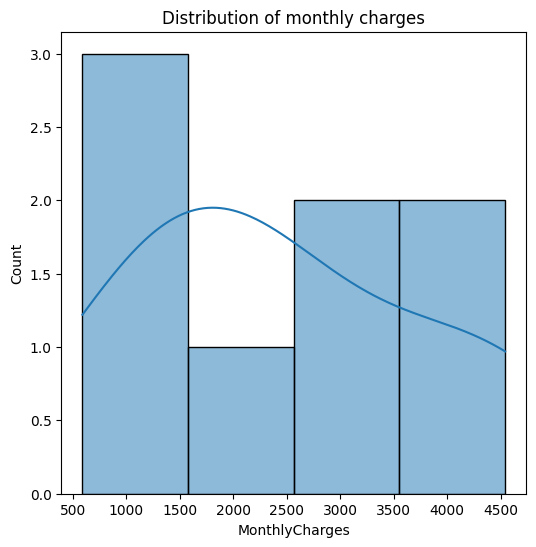

In [30]:
plt.figure(figsize=(6,6))
sns.histplot(data=df,x='MonthlyCharges',kde=True)
plt.title("Distribution of monthly charges")
plt.show()

//Task-7

In [31]:
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

print("Churn column converted to numeric")

Churn column converted to numeric


C:\Users\Sivaneela sankari\AppData\Local\Temp\ipykernel_13112\4095310355.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})


//Task-8

In [32]:
unique=df['customer_id'].is_unique
print("IS customer id unique?:",unique)

IS customer id unique?: True


//Task-9

In [33]:
drop_dup=df.drop_duplicates(inplace=True)
print("Duploicate rows removed")

Duploicate rows removed


//Task-10

In [34]:
pivot_table = df.pivot_table(
    index='City',
    columns='Product',
    values='Sales',
    aggfunc='sum'
)
print("pivot table:",pivot_table)

pivot table: Product    Product A  Product B  Product C
City                                      
Bangalore        NaN    10891.0     6717.0
Chennai      13724.0        NaN        NaN
Delhi         3379.0        NaN        NaN
Hyderabad        NaN        NaN    17656.0
Mumbai        9182.0     5826.0        NaN


//Task-11

In [39]:
df['is_senior']=df['Age']>=65
print("Senior citizen column added:\n",df)

Senior citizen column added:
   customer_id CustomerName   Age  Gender       City    Product  \
0     CUST001   Customer_1  35.0  Female  Hyderabad  Product C   
1     CUST002   Customer_2  70.0    Male  Bangalore  Product B   
2     CUST003   Customer_3  64.0  Female      Delhi  Product A   
3     CUST004   Customer_4  52.0  Female  Bangalore  Product C   
4     CUST005   Customer_5  66.0    Male    Chennai  Product A   
5     CUST006   Customer_6  71.0  Female     Mumbai  Product B   
7     CUST008   Customer_8  30.0  Female     Mumbai  Product A   
9     CUST010   Customer_8  30.0  Female     Mumbai  Product A   

   MonthlyCharges  Sales  Churn  is_senoir  is_seni0r  is_senior  
0            4543  17656      0      False      False      False  
1            1720  10891      0       True       True       True  
2            4234   3379      1      False      False      False  
3            2568   6717      0      False      False      False  
4            2896  13724      1       Tr

//Task-12

In [40]:
contingency_table = pd.crosstab(df['Churn'], df['is_senior'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print("Chi-square value:", chi2)
print("P-value:", p)

Chi-Square Test Results:
Chi-square value: 0.0
P-value: 1.0


//Task-13

In [41]:
group1_sales = df[df['Product'] == 'Product A']['Sales']
group2_sales = df[df['Product'] == 'Product B']['Sales']

t_stat, p_value = stats.ttest_ind(group1_sales, group2_sales, equal_var=False)

print("Independent T-Test Results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Independent T-Test Results:
T-statistic: -0.5121120651353315
P-value: 0.6457087327678951
